<div align="center">
<h1><img width="30" src="https://madewithml.com/static/images/rounded_logo.png">&nbsp;<a href="https://madewithml.com/">Made With ML</a></h1>
Applied ML · MLOps · Production
<br>
Join 30K+ developers in learning how to responsibly <a href="https://madewithml.com/about/">deliver value</a> with ML.
    <br>
</div>

<br>

<div align="center">
    <a target="_blank" href="https://madewithml.com"><img src="https://img.shields.io/badge/Subscribe-30K-brightgreen"></a>&nbsp;
    <a target="_blank" href="https://github.com/GokuMohandas/Made-With-ML"><img src="https://img.shields.io/github/stars/GokuMohandas/Made-With-ML.svg?style=social&label=Star"></a>&nbsp;
    <a target="_blank" href="https://www.linkedin.com/in/goku"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
    <a target="_blank" href="https://twitter.com/GokuMohandas"><img src="https://img.shields.io/twitter/follow/GokuMohandas.svg?label=Follow&style=social"></a>
    <br>
    🔥&nbsp; Among the <a href="https://github.com/topics/deep-learning" target="_blank">top ML</a> repositories on GitHub
</div>

<br>
<hr>

# Pandas

In this lesson we will learn the basics of data manipulation using the Pandas library. 

<div align="left">
<a target="_blank" href="https://madewithml.com/courses/foundations/pandas/"><img src="https://img.shields.io/badge/📖 Read-blog post-9cf"></a>&nbsp;
<a href="https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/04_Pandas.ipynb" role="button"><img src="https://img.shields.io/static/v1?label=&amp;message=View%20On%20GitHub&amp;color=586069&amp;logo=github&amp;labelColor=2f363d"></a>&nbsp;
<a href="https://colab.research.google.com/github/GokuMohandas/Made-With-ML/blob/main/notebooks/04_Pandas.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

# Set up

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Set seed for reproducibility
np.random.seed(seed=1234)

# Load data

We're going to work with the [Titanic dataset](https://www.kaggle.com/c/titanic/data) which has data on the people who embarked the RMS Titanic in 1912 and whether they survived the expedition or not. It's a very common and rich dataset which makes it very apt for exploratory data analysis with Pandas.

Let's load the data from the CSV file into a Pandas dataframe. The `header=0` signifies that the first row (0th index) is a header row which contains the names of each column in our dataset.

In [ ]:
# Read from CSV to Pandas DataFrame
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/titanic.csv"
df = pd.read_csv(url, header=0)

In [ ]:
# First five items
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


These are the different features: 
* `class`: class of travel
* `name`: full name of the passenger
* `sex`: gender
* `age`: numerical age
* `sibsp`: # of siblings/spouse aboard
* `parch`: number of parents/child aboard
* `ticket`: ticket number
* `fare`: cost of the ticket
* `cabin`: location of room
* `emarked`: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q - Queenstown)
* `survived`: survival metric (0 - died, 1 - survived)

# Exploratory data analysis (EDA)

Now that we loaded our data, we're ready to start exploring it to find interesting information.

> Be sure to check out our entire lesson devoted to [EDA](https://madewithml.com/courses/mlops/exploratory-data-analysis/) in our [mlops](https://madewithml.com/#mlops) course.

In [ ]:
import matplotlib.pyplot as plt

We can use `.describe()` to extract some standard details about our numerical features. 

In [ ]:
# Describe features
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


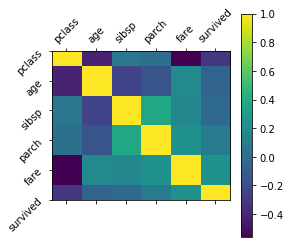

In [ ]:
# Correlation matrix
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()

We can also use `.hist()` to view the histrogram of values for each feature.

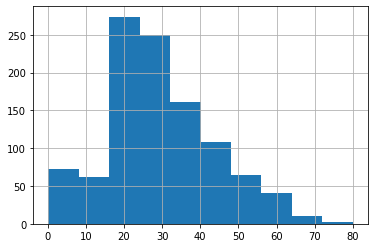

In [ ]:
# Histograms
df["age"].hist()

In [ ]:
# Unique values
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

# Filtering

In [ ]:
# Selecting data by feature
df["name"].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [ ]:
# Filtering
df[df["sex"]=="female"].head() # only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


# Sorting

In [ ]:
# Sorting
df.sort_values("age", ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


# Grouping

In [ ]:
# Grouping
survived_group = df.groupby("survived")
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


# Indexing

We can use `iloc` to get rows or columns at particular positions in the dataframe.

In [ ]:
# Selecting row 0
df.iloc[0, :] 

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [ ]:
# Selecting a specific value
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

# Preprocessing

After exploring, we can clean and preprocess our dataset.

> Be sure to check out our entire lesson focused on [preprocessing](https://madewithml.com/courses/mlops/preprocessing/) in our [mlops](https://madewithml.com/#mlops) course.

In [ ]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [ ]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
# Dropping multiple columns
df = df.drop(["name", "cabin", "ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [ ]:
# Map feature values
df["sex"] = df["sex"].map( {"female": 0, "male": 1} ).astype(int)
df["embarked"] = df["embarked"].dropna().map( {"S":0, "C":1, "Q":2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# Feature engineering

We're now going to use feature engineering to create a column called `family_size`. We'll first define a function called `get_family_size` that will determine the family size using the number of parents and siblings. 

In [ ]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

Once we define the function, we can use `lambda` to `apply` that function on each row (using the numbers of siblings and parents in each row to determine the family size for each row).

In [ ]:
df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [ ]:
# Reorganize headers
df = df[["pclass", "sex", "age", "sibsp", "parch", "family_size", "fare", "embarked", "survived"]]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


# Save data

Finally, let's save our preprocessed data into a new CSV file to use later.

In [ ]:
# Saving dataframe to CSV
df.to_csv("processed_titanic.csv", index=False)

In [ ]:
# See the saved file
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Dec  3 17:36 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Nov 21 16:30 sample_data
-rw-r--r-- 1 root root 85153 Dec  3 17:36 titanic.csv
